# Swisscom Assignment : Fake Job posting Prediction

***Dataset:*** [Fake Job posting Prediction](https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction )

***Task:*** *Predict which job posting is fake . Use both simple and complex NLP methods to do the job.*

***Challenge:*** *It’s an unbalanced dataset*

In [1]:
import pandas as pd
import ast

from preprocessing import Preprocessing
from feature_extraction import FeatureExtract
from models import Models

### Load dataset

- The processing includes a spell checker which takes some time to compute. 
- Run the cells below "First Time" if you haven't saved the preprocessing before. 
- Otherwise ignore those cells and strat from "Already processed" to reload the preprocessed dataframe.

#### First time

In [2]:
#df = pd.read_csv('fake_job_postings.csv')

In [3]:
#prepro = Preprocessing()
#processed_df = prepro.preprocess_text(df, 'description','stem')

In [4]:
#processed_df.to_csv('./data/spelled_df.csv')

#### Already processed

In [5]:
processed_df = pd.read_csv('./data/spelled_df.csv')
processed_df.stem_lem = processed_df.stem_lem.apply(lambda x: ast.literal_eval(x))

### Dataset preparation

- Text feature extraction with TFIDF 
- PCA
- train / test preparation.

In [6]:
feat = FeatureExtract(processed_df)
X_df, y_df = feat.full_df()

In [7]:
my_models = Models()

In [8]:
X_tr, X_te, y_tr, y_te = my_models.data_set_prep(X_df, y_df)

Train/Test split done. Start PCA...
PCA done.


### Models training and comparison

In [9]:
LR = my_models.logistic_reg(X_tr, X_te, y_tr, y_te)

Logistic Reg created. Start fitting the model...
LR trained. Start prediction...
RF AUC-ROC score : 0.6816749575523268
RF AUC-ROC score with probas : 0.9490172835439554


In [10]:
DT = my_models.decision_tree(X_tr, X_te, y_tr, y_te)

Decision tree created. Start fitting the model...
DT trained. Start prediction...
RF AUC-ROC score : 0.7491296466251526
RF AUC-ROC score with probas : 0.7491296466251526


In [11]:
RF = my_models.random_forest(X_tr, X_te, y_tr, y_te)

RandomForest created. Start fitting the model...
RF trained. Start prediction...
RF AUC-ROC score : 0.7027649769585254
RF AUC-ROC score with probas : 0.9224689322039958


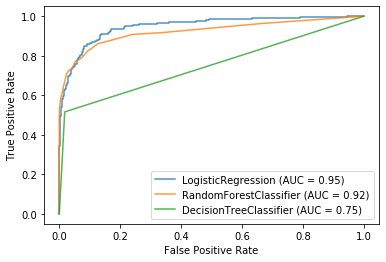

In [12]:
my_models.plot_ROC_curves([LR, RF, DT], X_te, y_te)